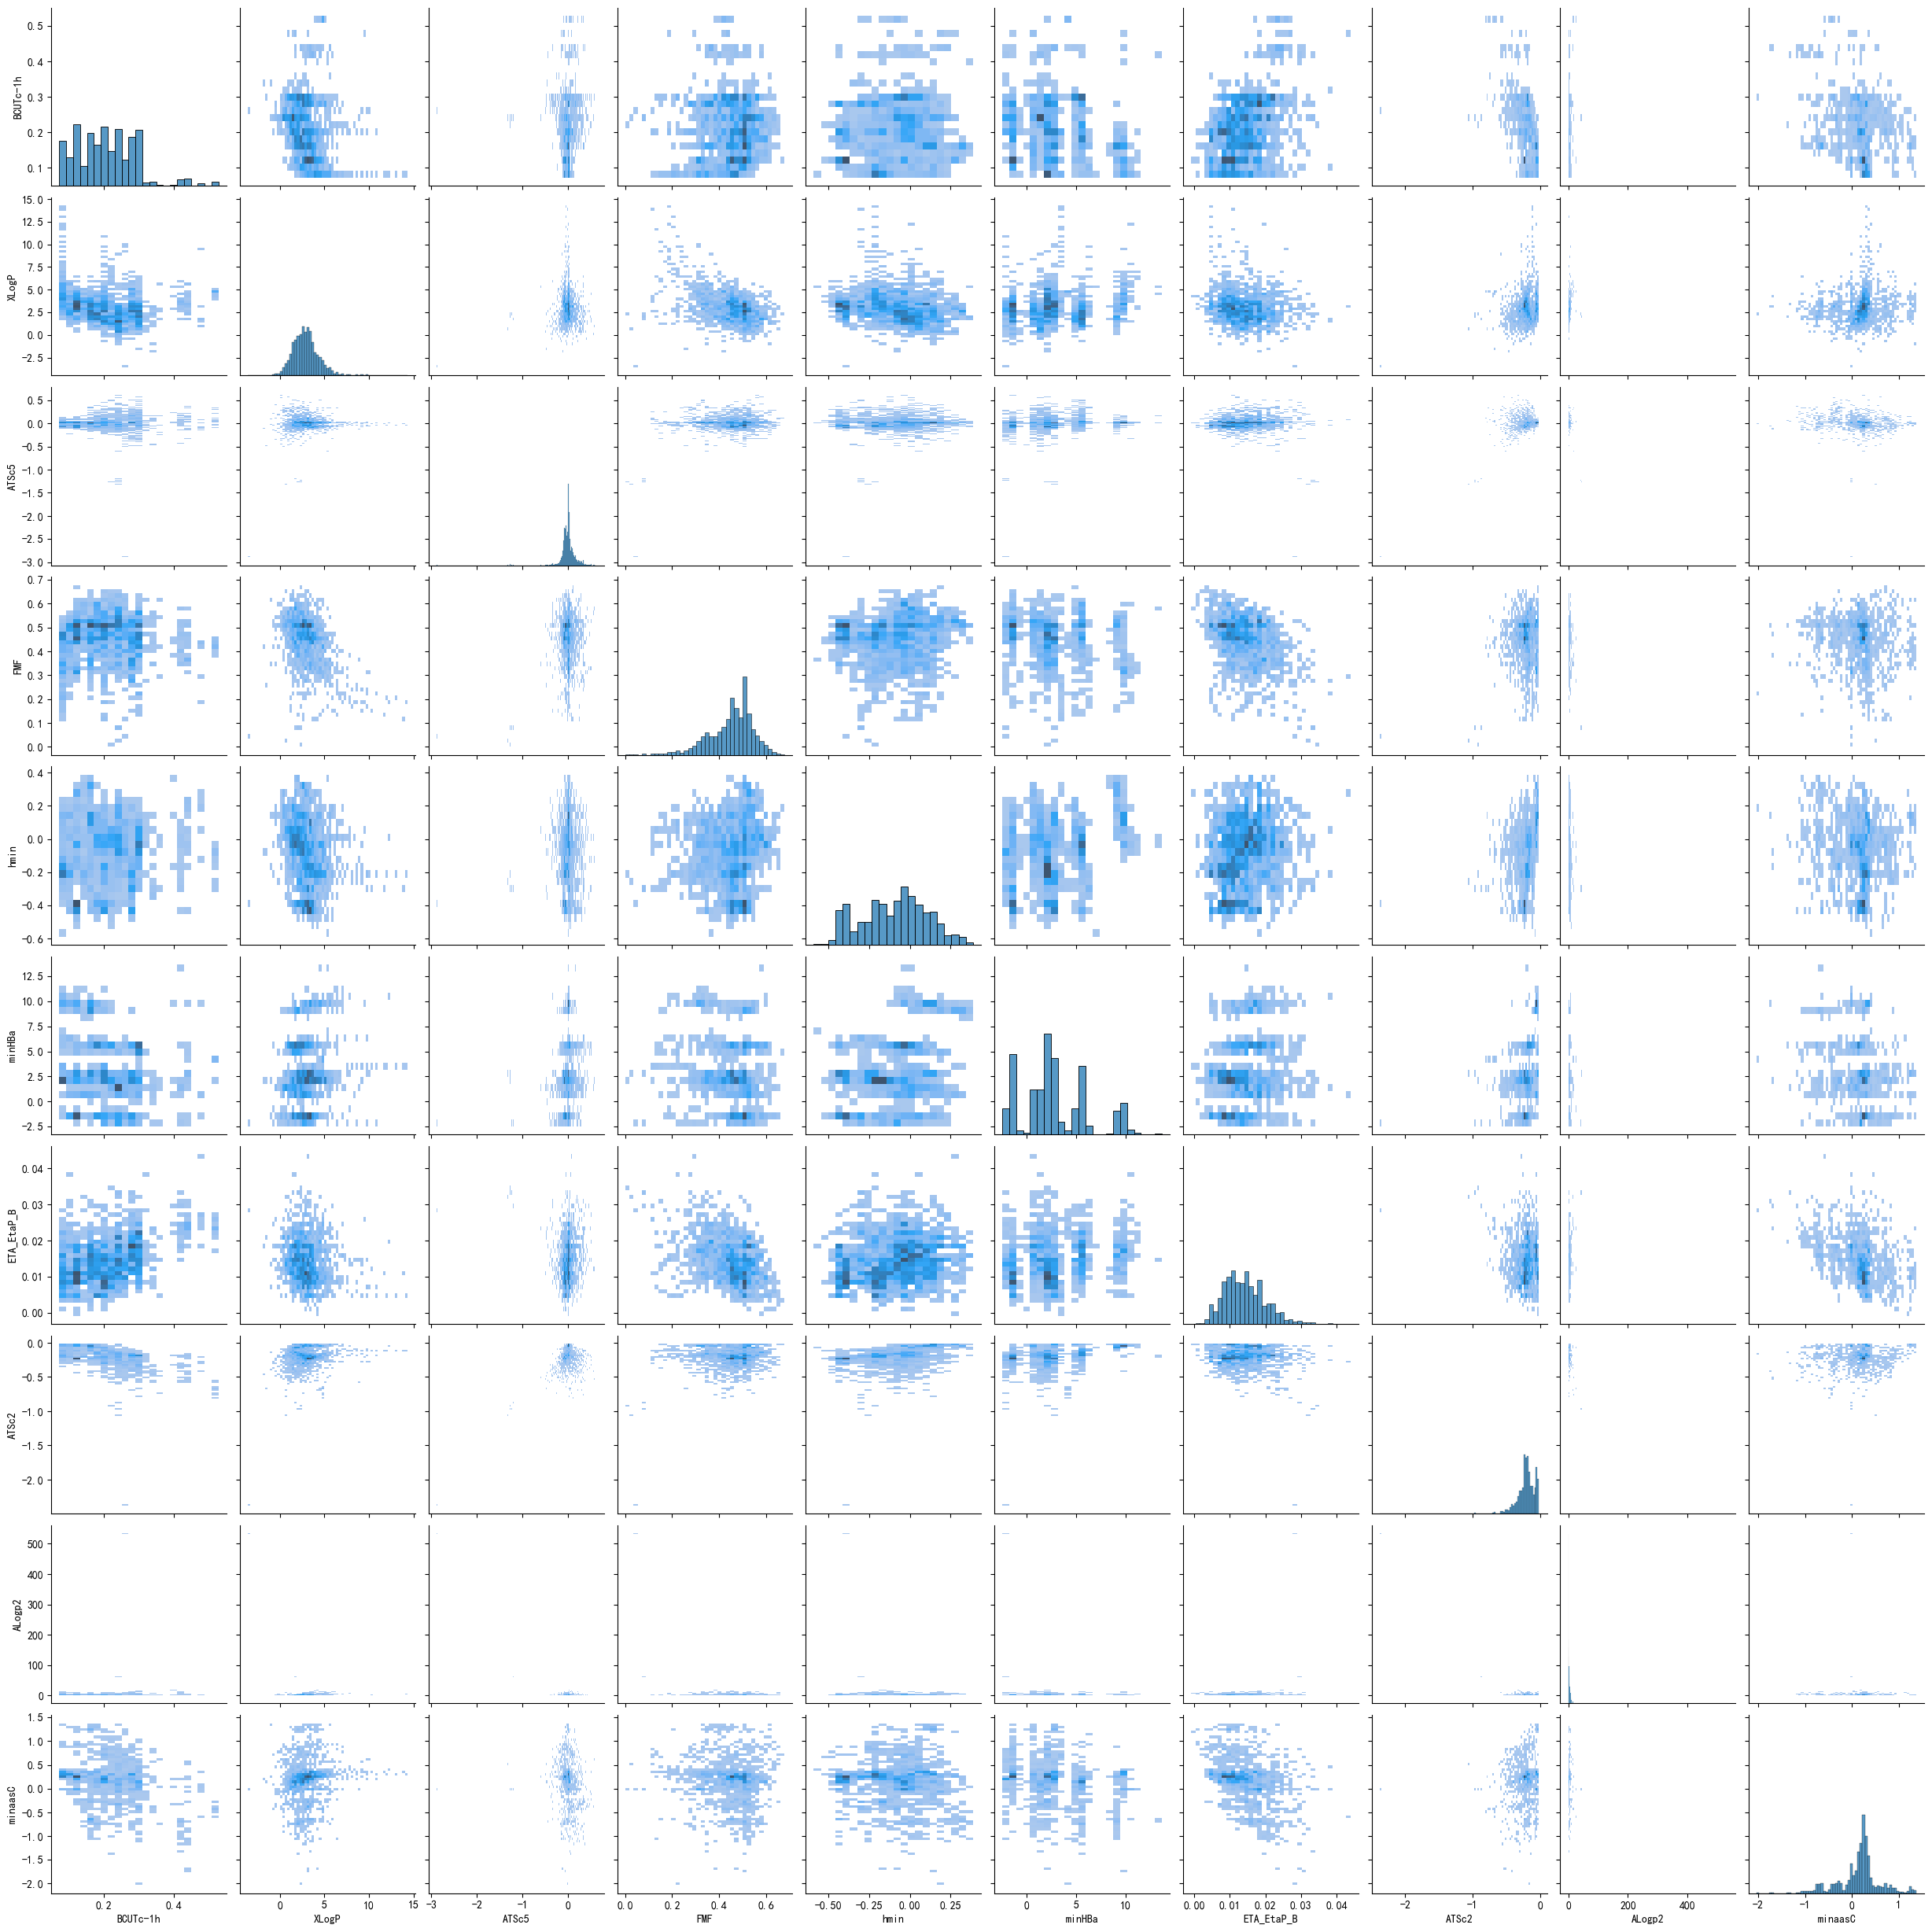

In [49]:
import pandas as pd
import seaborn as sns

mse_train=[]
mse_test=[]

R2_train=[]
R2_test=[]

# twinty_molecule=[
#     'MDEC-23',
#     'minsOH',
#     'BCUTp-1h',
#     'C1SP2',
#     'maxdO',
#     'XLogP',
#     'ATSm5',
#     'maxHBd',
#     'maxssO',
#     'SHBint10',
#     'SPC-6',
#     'BCUTp-1l',
#     'maxsF',
#     'minHBa',
#     'MDEO-12',
#     'ATSc5',
#     'maxHBint5',
#     'ATSc1',
#     'gmin',
#     'SHBint7'
# ]
# x_s=pd.read_excel(io='Molecular_Descriptor.xlsx',usecols=twinty_molecule)
# x_s.head()
x_s=pd.read_csv('./20features_pIC50.csv')
x_s=x_s.iloc[:,1:]
x_s.head()
sns.pairplot(data=x_s.iloc[:,:10], kind="hist")

In [50]:
x_predict=pd.read_excel(io='Molecular_Descriptor.xlsx',usecols=list(x_s),sheet_name='test')
x_predict.head()

,ALogp2,ATSc2,ATSc5,BCUTc-1h,BCUTp-1l,SC-3,SHBint6,SHaaCH,SsOH,minHBa,minHBint5,minaasC,maxHBa,hmin,gmin,ETA_Epsilon_3,ETA_EtaP_B,FMF,MDEC-22,XLogP
0,3.309852,-0.410070,0.287640,0.278515,4.877529,3.624604,0.0,8.359501,19.639753,5.326938,0.0,0.114468,13.739923,-0.412956,-5.978139,0.44454,0.01582,0.479452,23.343682,2.526
1,7.446895,-0.193323,0.004507,0.283440,3.924776,1.784324,0.0,6.119245,18.510490,5.996806,0.0,0.232169,10.760269,-0.181995,-0.971069,0.44321,0.01034,0.469388,26.377682,3.681
2,4.974238,-0.275291,0.130651,0.283450,3.925043,1.988448,0.0,5.850222,18.586779,5.369229,0.0,0.218036,10.802321,-0.209772,-0.981303,0.44253,0.01187,0.433962,23.299145,3.710
3,6.962738,-0.208054,0.079973,0.283448,3.924751,2.072999,0.0,6.104454,18.491124,5.837639,0.0,-0.365427,13.844825,-0.161995,-1.006229,0.44286,0.01353,0.469388,23.299145,3.586
4,11.447396,-0.151299,0.028317,0.283445,3.927229,2.072999,0.0,5.637899,18.546136,-1.360925,0.0,-0.187186,13.958899,0.198682,-1.360925,0.44286,0.01353,0.469388,23.299145,3.978


In [51]:
y_s=pd.read_excel(io='ERα_activity.xlsx',usecols=['pIC50'])
y_s.head()

,pIC50
0,8.602060
1,8.124939
2,8.508638
3,8.408935
4,8.130768


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,test_size=0.3,random_state=0)


In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### R2评价指标

In [54]:
def R_squared(y, y_pred):
  print(y.shape,y_pred.shape)
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.math.divide(residual, total))
  return r2

### bp神经网络

In [55]:
x=np.array(x_s)
y=np.array(y_s)
x.shape,y.shape

input_data=tf.keras.Input(shape=(20,))
neural_networks_1=tf.keras.layers.Dense(80,activation='relu')(input_data)
neural_networks_2=tf.keras.layers.Dense(80,activation='relu')(neural_networks_1)
neural_networks_3=tf.keras.layers.Dense(80,activation='relu')(neural_networks_2)
output_y=tf.keras.layers.Dense(1)(neural_networks_3)

model_neural_networks=tf.keras.Model(inputs=input_data,outputs=output_y)
model_neural_networks.summary()
model_neural_networks.compile(optimizer='adam',loss='MSE')
answer=model_neural_networks.fit(x=x_train,y=y_train,epochs=100,validation_data=(x_test,y_test))
y_out=model_neural_networks.predict(x=x_train)
y_out_test=model_neural_networks.predict(x=x_test)
print("训练集的R2",R_squared(y_train,y_out))
print("测试集的R2",R_squared(y_test,y_out_test))

mse_train.append(answer.history.get("loss")[-1])
mse_test.append(answer.history.get("val_loss")[-1])

R2_train.append(R_squared(y_train,y_out))
R2_test.append(R_squared(y_test,y_out_test))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_14 (Dense)            (None, 80)                1680      
                                                                 
 dense_15 (Dense)            (None, 80)                6480      
                                                                 
 dense_16 (Dense)            (None, 80)                6480      
                                                                 
 dense_17 (Dense)            (None, 1)                 81        
                                                                 
Total params: 14,721
Trainable params: 14,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
44/44 [==============================] - 1s

画图

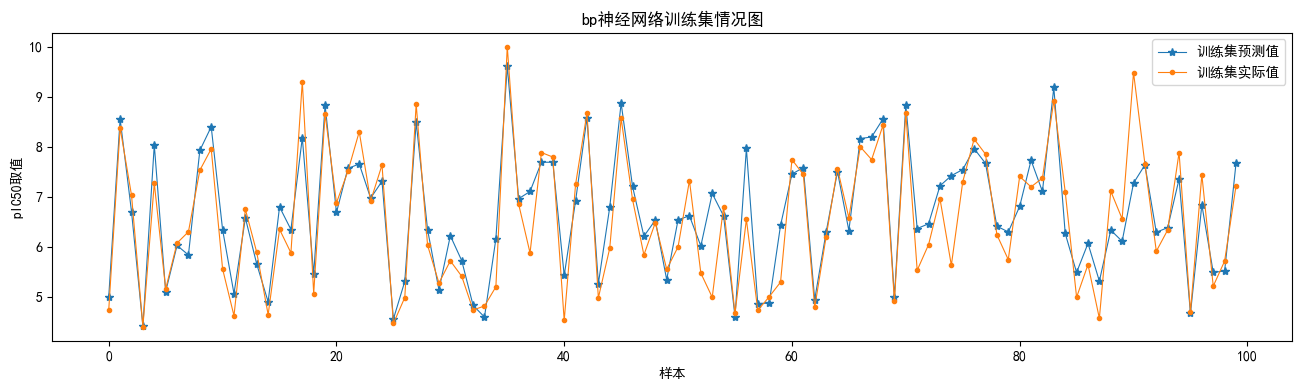

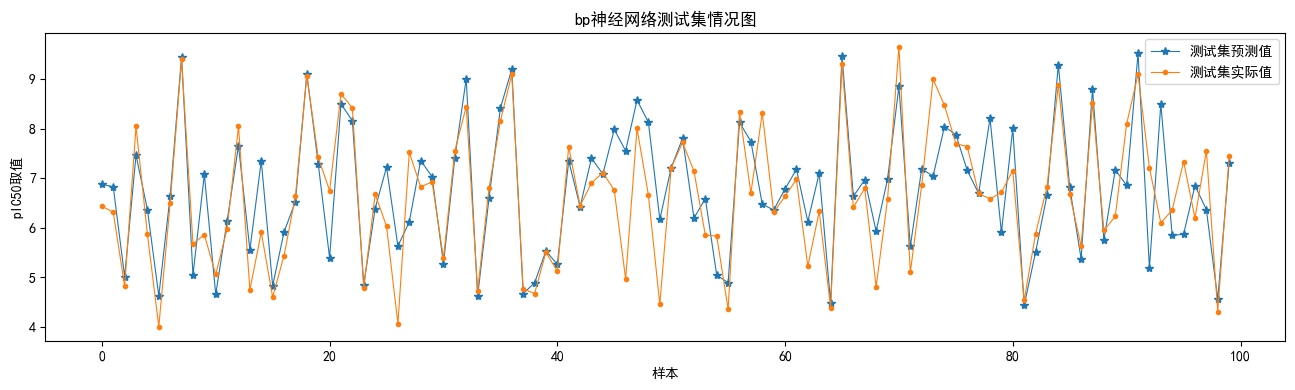

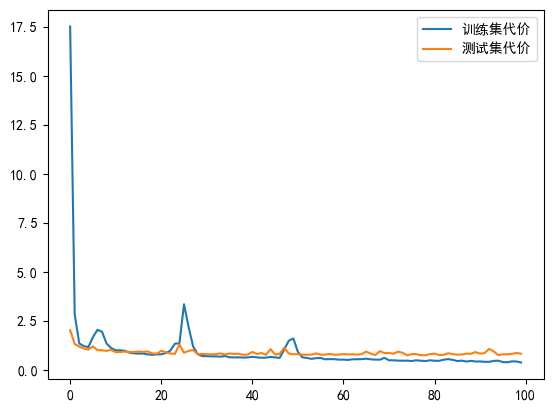

2/2 [==============================] - 0s 2ms/step


In [56]:
plt.figure(figsize=(16,4))
plt.plot(y_out[:100],label="训练集预测值",linewidth=0.8,marker="*")
plt.plot(np.array(y_train)[:100],label="训练集实际值",linewidth=0.8,marker=".")
plt.title("bp神经网络训练集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()

# plt.figure(figsize=(16,4))
# plt.plot(y_out,label="训练集预测值",linewidth=0.8,marker="*")
# plt.plot(np.array(y_train),label="训练集实际值",linewidth=0.8,marker=".")
# plt.legend()
# plt.show()

plt.figure(figsize=(16,4))
plt.plot(y_out_test[:100],label="测试集预测值",linewidth=0.8,marker="*")
plt.plot(np.array(y_test)[:100],label="测试集实际值",linewidth=0.8,marker=".")
plt.title("bp神经网络测试集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()

# plt.figure(figsize=(16,4))
# plt.plot(y_out_test,label="测试集预测值",linewidth=0.8,marker="*")
# plt.plot(np.array(y_test),label="测试集实际值",linewidth=0.8,marker=".")
# plt.legend()
# plt.show()

plt.plot(answer.history.get("loss"),label="训练集代价")
plt.plot(answer.history.get("val_loss"),label="测试集代价")
plt.legend()
plt.show()

model_neural_networks.save("model_neural_networks.h5")
y_predict=model_neural_networks.predict(x=x_predict)
np.savetxt('answer.txt',y_predict)

### 随机森林

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

random_forest=RandomForestRegressor(random_state=0)
random_forest.fit(x_train,y_train)
forest_train_out=random_forest.predict(x_train)
forest_test_out=random_forest.predict(x_test)
print("训练集mse",mean_squared_error(y_train,forest_train_out),"R2",r2_score(y_train,forest_train_out))
print("测试集mse",mean_squared_error(y_test,forest_test_out),"R2",r2_score(y_test,forest_test_out))
train_out=random_forest.predict(x_train)
test_out=random_forest.predict(x_test)

mse_train.append(mean_squared_error(y_train,forest_train_out))
mse_test.append(mean_squared_error(y_test,forest_test_out))

R2_train.append(R_squared(y_train,y_out))
R2_test.append(R_squared(y_test,y_out_test))


C:\TempFiles\ipykernel_16740\3764315943.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


训练集mse 0.09042864930956881 R2 0.9553013862534053
测试集mse 0.5551145506122802 R2 0.7259962361523984
(1381, 1) (1381, 1)
(593, 1) (593, 1)


画图

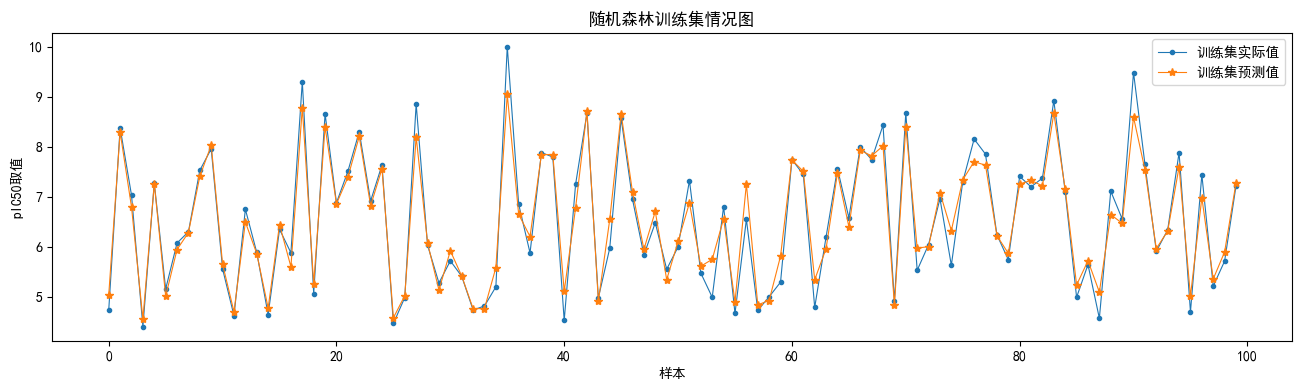

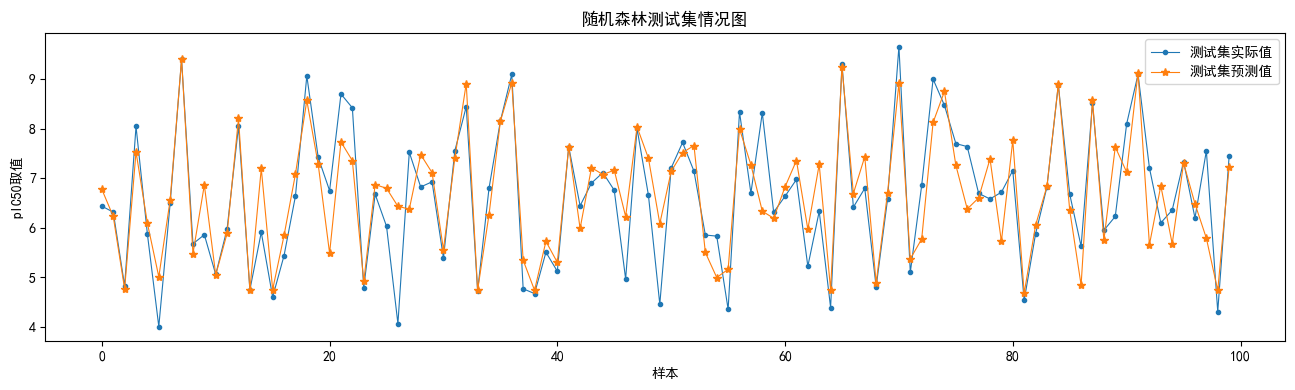

D:\Python3\Lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [58]:
# print(y_test['pIC50'])
plt.figure(figsize=(16,4))
plt.plot(np.array(y_train['pIC50'])[:100],label="训练集实际值",linewidth=0.8,marker=".")
plt.plot(train_out[:100],label="训练集预测值",linewidth=0.8,marker="*")
plt.title("随机森林训练集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.plot(np.array(y_test['pIC50'])[:100],label="测试集实际值",linewidth=0.8,marker=".")
plt.plot(test_out[:100],label="测试集预测值",linewidth=0.8,marker="*")
plt.title("随机森林测试集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()
random_forest_predict=random_forest.predict(x_predict)
np.savetxt("random_forest_predict.txt",random_forest_predict)

### 支持向量机SVM

In [59]:
from sklearn import svm

svm_model=svm.SVR(C=3.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,kernel='rbf',gamma="auto", max_iter=-1, shrinking=True, tol=0.01, verbose=True)
svm_model.fit(X=np.array(x_train),y=np.array(y_train))
svm_train_out=svm_model.predict(np.array(x_train))
svm_test_out=svm_model.predict(np.array(x_test))
print("训练集mse",mean_squared_error(np.array(y_train),svm_train_out),"R2",r2_score(np.array(y_train),svm_train_out))
print("测试集mse",mean_squared_error(np.array(y_test),svm_test_out),"R2",r2_score(np.array(y_test),svm_test_out))
svm_answer=svm_model.predict(np.array(x_predict))
np.savetxt("svm_answer.txt",svm_answer)

mse_train.append(mean_squared_error(np.array(y_train),svm_train_out))
mse_test.append(mean_squared_error(np.array(y_test),svm_test_out))

R2_train.append(r2_score(np.array(y_train),svm_train_out))
R2_test.append(r2_score(np.array(y_test),svm_test_out))

D:\Python3\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]训练集mse 0.15298061114286313 R2 0.9243821366303515
测试集mse 0.7342717621911753 R2 0.6375644877161283


画图

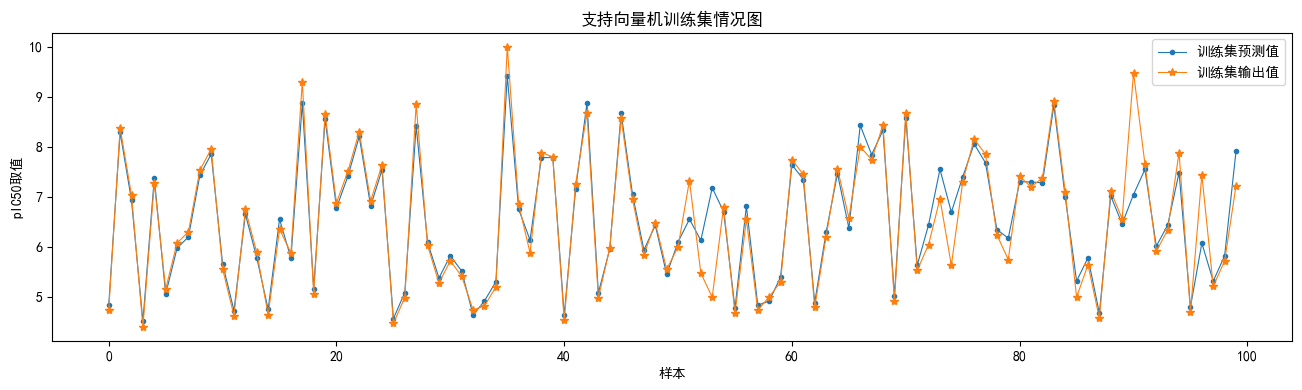

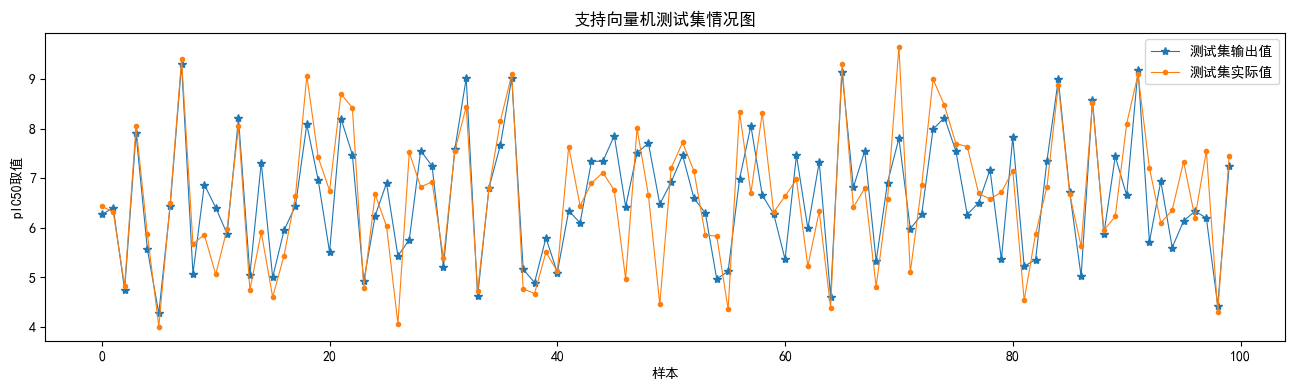

In [60]:
plt.figure(figsize=(16,4))
plt.plot(svm_train_out[:100],label="训练集预测值",linewidth=0.8,marker=".")
plt.plot(np.array(y_train['pIC50'])[:100],label="训练集输出值",linewidth=0.8,marker="*")
plt.title("支持向量机训练集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.plot(svm_test_out[:100],label="测试集输出值",linewidth=0.8,marker="*")
plt.plot(np.array(y_test['pIC50'])[:100],label="测试集实际值",linewidth=0.8,marker=".")
plt.title("支持向量机测试集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()

### 卷积神经网络CNN

In [61]:
cnn_input=tf.keras.Input(shape=(20,1))
cnn_1=tf.keras.layers.Conv1D(20,kernel_size=2,strides=1,activation="relu",padding='same')(cnn_input)
cnn_pool_1=tf.keras.layers.MaxPool1D(pool_size=2,strides=1,padding='same')(cnn_1)

cnn_2=tf.keras.layers.Conv1D(40,kernel_size=2,strides=1,activation="relu",padding='same')(cnn_pool_1)
cnn_pool_2=tf.keras.layers.MaxPool1D(pool_size=2,strides=1,padding='same')(cnn_2)

one=tf.keras.layers.Reshape(target_shape=(-1,))(cnn_pool_2)

network_1=tf.keras.layers.Dense(80,activation='relu')(one)
network_2=tf.keras.layers.Dense(10,activation='relu')(network_1)
outCNN=tf.keras.layers.Dense(1)(network_2)

cnn_model=tf.keras.Model(inputs=cnn_input,outputs=outCNN)
cnn_model.summary()
cnn_model.compile(optimizer='adam',loss='MSE')
cnn_history=cnn_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

mse_train.append(cnn_history.history.get("loss")[-1])
mse_test.append(cnn_history.history.get("val_loss")[-1])

R2_train.append(R_squared(np.array(y_train),cnn_model.predict(x_train)))
R2_test.append(R_squared(np.array(y_test),cnn_model.predict(x_test)))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 20, 20)            60        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 20, 20)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 20, 40)            1640      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 20, 40)           0         
 1D)                                                             
                                                                 
 reshape_2 (Reshape)         (None, 800)               0   

画图

44/44 [==============================] - 0s 2ms/step
(1381, 1) (1381, 1)
trainR2: tf.Tensor(0.7572379201699466, shape=(), dtype=float64)
19/19 [==============================] - 0s 2ms/step
(593, 1) (593, 1)
testR2: tf.Tensor(0.6544002454918953, shape=(), dtype=float64)
44/44 [==============================] - 0s 2ms/step


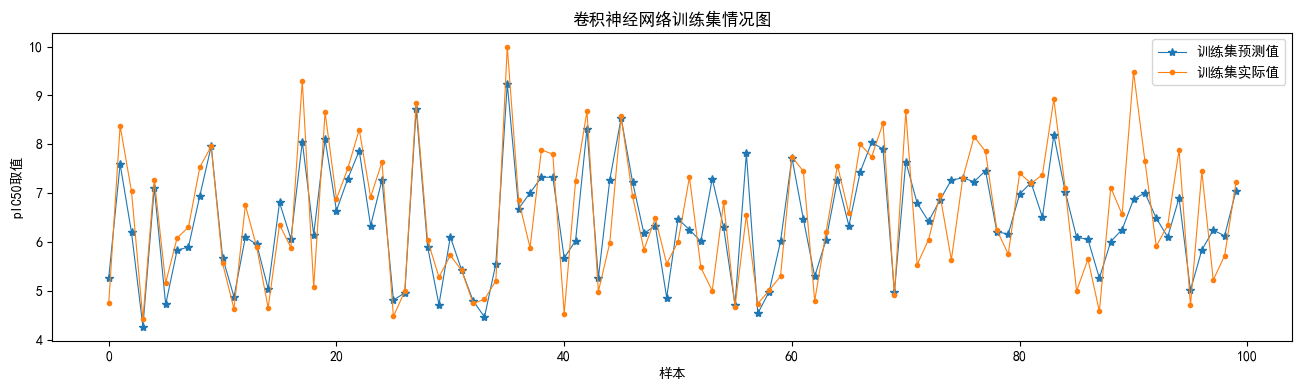

19/19 [==============================] - 0s 2ms/step


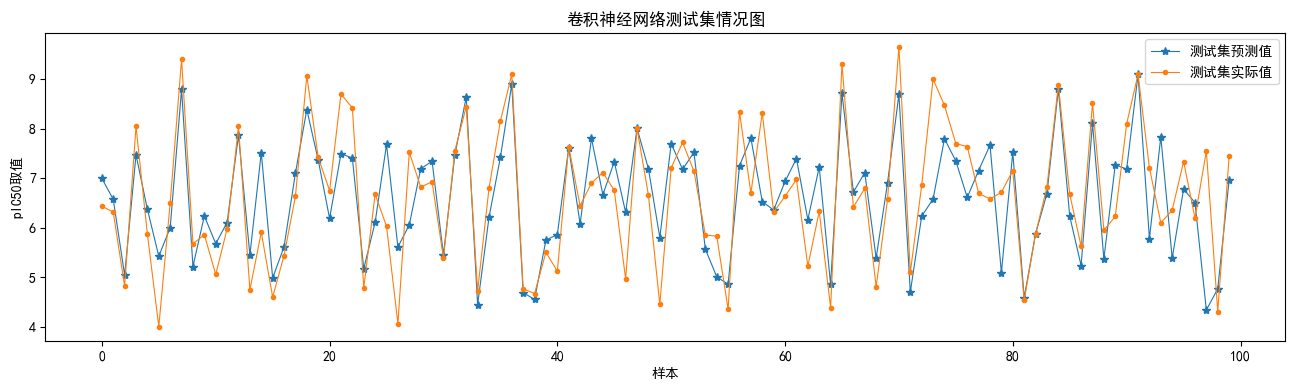

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


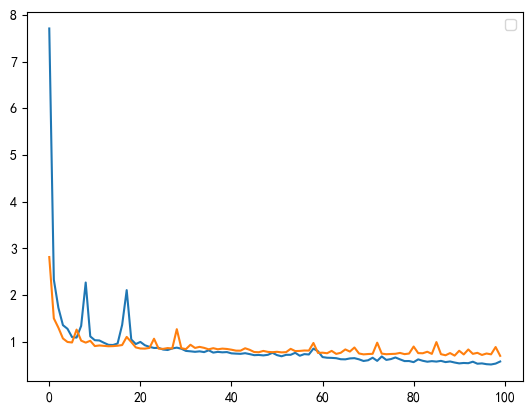

In [62]:
print("trainR2:",R_squared(np.array(y_train),cnn_model.predict(x_train)))
print("testR2:",R_squared(np.array(y_test),cnn_model.predict(x_test)))

plt.figure(figsize=(16,4))
plt.plot(cnn_model.predict(x_train)[:100],label="训练集预测值",linewidth=0.8,marker="*")
plt.plot(np.array(y_train['pIC50'])[:100],label="训练集实际值",linewidth=0.8,marker=".")
plt.title("卷积神经网络训练集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.plot(cnn_model.predict(x_test)[:100],label="测试集预测值",linewidth=0.8,marker="*")
plt.plot(np.array(y_test['pIC50'])[:100],label="测试集实际值",linewidth=0.8,marker=".")
plt.title("卷积神经网络测试集情况图")
plt.xlabel("样本")
plt.ylabel("pIC50取值")
plt.legend()
plt.show()

plt.plot(cnn_history.history.get("loss"))
plt.plot(cnn_history.history.get("val_loss"))
plt.legend()
plt.show()


### 四种方法的比较

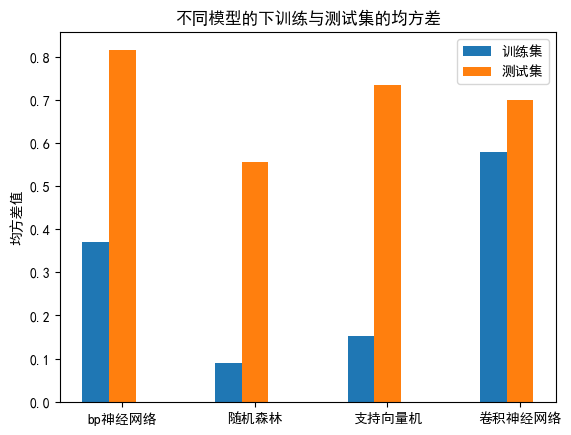

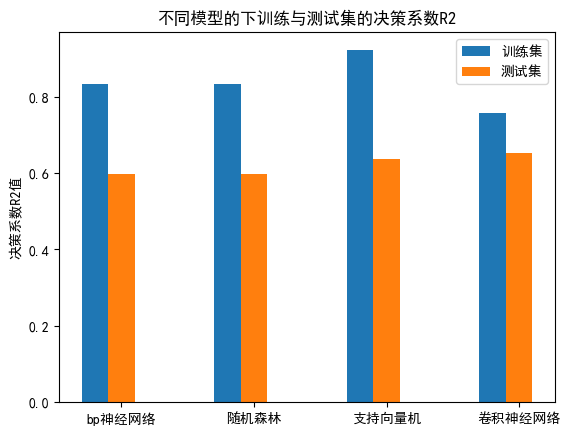

In [63]:
label=["bp神经网络","随机森林","支持向量机","卷积神经网络"]
x_nums=np.arange(4)
plt.bar(x_nums,mse_train,width=0.2,label="训练集")
plt.bar(x_nums+0.2,mse_test,width=0.2,label="测试集")
plt.xticks(x_nums+0.2,labels=label)
plt.ylabel("均方差值")
plt.title("不同模型的下训练与测试集的均方差")
plt.legend()
plt.show()

plt.bar(x_nums,R2_train,width=0.2,label="训练集")
plt.bar(x_nums+0.2,R2_test,width=0.2,label="测试集")
plt.xticks(x_nums+0.2,labels=label)
plt.ylabel("决策系数R2值")
plt.title("不同模型的下训练与测试集的决策系数R2")
plt.legend()
plt.show()